# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 8

### Zadanie 1

1. Wczytaj plik `mieszkania.csv` za pomocą jednej z poniższych bibliotek:
   - [`pandas`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) – funkcja `read_csv`,
   - [`numpy`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) – funkcja `genfromtxt`,
   - [`csv`](https://docs.python.org/3/library/csv.html) – funkcja `reader`.

2. Usuń nieprawidłowe dane, np. wiersze zawierające wartość `-` lub cenę równą `0`.

3. Zamień wartości liczbowe zapisane jako tekst na odpowiedni typ liczbowy.

4. Przedstaw **funkcję masy prawdopodobieństwa** wartości mieszkań w zależności od rodzaju *transakcji rynkowej*.  
   **Podpowiedź:** Skorzystaj z funkcji `displot` z biblioteki `seaborn` (jeśli nie masz biblioteki, zainstaluj ją poleceniem `pip install seaborn`).  
   Zwróć uwagę na argumenty: `x`, `hue`, `kind`, `fill`.

5. Wyświetl wszystkie trzy funkcje (dla ogółu, rynku pierwotnego i wtórnego) na jednym wykresie.

6. Zinterpretuj wyniki.

---

#### Informacje o zbiorze danych

- Dane dotyczą sprzedaży oraz cen nieruchomości i pochodzą z Głównego Urzędu Statystycznego (GUS), opracowane na podstawie danych z Rejestru Cen Nieruchomości (RCN), a do 31 lipca 2021 – z Rejestru Cen i Wartości Nieruchomości (RCiWN), prowadzonego przez starostwa powiatowe i prezydentów miast na prawach powiatu. Dane pochodzą z aktów notarialnych.
- Uwzględniono wyłącznie transakcje kupna/sprzedaży lokali mieszkalnych w budynkach wielorodzinnych (nie dotyczy domów jednorodzinnych), które miały miejsce w analizowanym okresie i zostały zarejestrowane w RCN przed datą przekazania danych do GUS.
- Dane dotyczą wyłącznie transakcji rynkowych, tj. sprzedaży na wolnym rynku (z wyłączeniem np. sprzedaży między osobami spokrewnionymi) oraz sprzedaży przetargowej.
- Podział na rynek pierwotny i wtórny:
  - **Rynek pierwotny**: sprzedaż na wolnym rynku przez osoby prawne, gdzie średnia cena 1 m² wynosi co najmniej 2 000 zł.
  - **Rynek wtórny**: pozostałe transakcje rynkowe, w tym sprzedaż przetargowa.
- W grudniu 2021 roku uzupełniono bazę BDL o dane za lata 2010–2014, obejmujące większą liczbę transakcji niż wcześniej publikowane dane.
- Brak danych od 2020 roku dla miasta Koszalin oraz częściowe braki dla Szczecina.

#### Oznaczenia w danych:

- `-` – brak informacji z powodu zmiany poziomu prezentacji, zmian w jednostkach terytorialnych lub cechach raportu,
- `n` – dane jeszcze niedostępne,
- `x` – brak informacji z powodu tajemnicy statystycznej lub niecelowości wypełnienia,
- `X` – brak danych ze względu na zmiany metodologiczne lub tajemnicę statystyczną.


Przed czyszczeniem: (71460, 8)
Po czyszczeniu: (50838, 8)
Index(['Nazwa', 'Transakcje rynkowe',
       'Powierzchnia użytkowa lokali mieszkalnych', 'Jednostka miary',
       'Atrybut'],
      dtype='object')
Index(['Kod', 'Rok', 'Wartosc'], dtype='object')
Transakcje rynkowe
ogółem             19629
rynek wtórny       19360
rynek pierwotny    11849
Name: count, dtype: int64


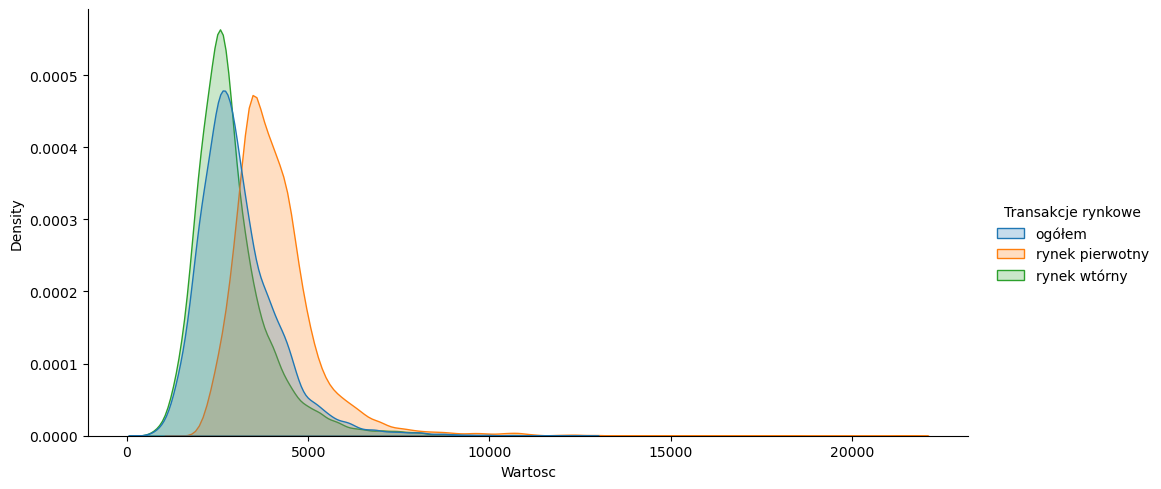

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


data = pd.read_csv('mieszkania.csv', sep=';', encoding='utf-8')
print(f"Przed czyszczeniem: {data.shape}")

data = data[~data.isin(['-']).any(axis=1)]
data['Wartosc'] = pd.to_numeric(data['Wartosc'], errors='coerce')
data = data[(data['Wartosc'] != 0) & (~data['Wartosc'].isna())]
print(f"Po czyszczeniu: {data.shape}")

cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(include=np.number).columns
print(cat_cols)
print(num_cols)
# print(data['Powierzchnia użytkowa lokali mieszkalnych'].value_counts())
print(50*"=")

print(data['Transakcje rynkowe'].value_counts())

sns.displot(
    data=data,
    x='Wartosc',
    hue='Transakcje rynkowe',
    kind='kde',
    fill=True,
    common_norm=False,
    height=5,
    aspect=2
)



Najwięcej mieszkań sprzedawano z rynku wtórnego o wartości zbliżonej do 2500 zł

### Zadanie 2 (kontynuacja poprzedniego)

1. Wyświetl dystrybuantę (empiryczną funkcję rozkładu) wartości mieszkań dla rodzaju transakcji `ogólny`.  
   **Podpowiedź:** Skorzystaj z funkcji `ecdfplot` z biblioteki `seaborn`.

2. Na podstawie wykresu oszacuj, jaki procent mieszkań sprzedawanych jest poniżej ceny 4 000 zł za m².


Około 83.3% mieszkań sprzedawanych jest poniżej ceny 4000 zł.


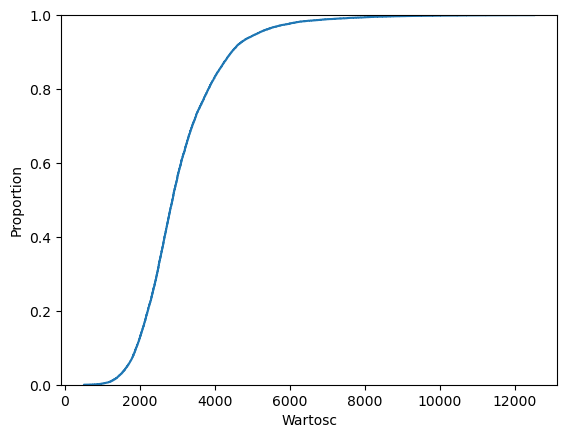

In [48]:
sns.ecdfplot(data=data[data['Transakcje rynkowe'] == 'ogółem'], x='Wartosc')

under_4000 = (
    data[(data['Transakcje rynkowe'] == 'ogółem') & (data['Wartosc'] < 4000)].shape[0]
    / data[data['Transakcje rynkowe'] == 'ogółem'].shape[0]
) * 100
print(f"Około {under_4000:.1f}% mieszkań sprzedawanych jest poniżej ceny 4000 zł.")

### Zadanie 3

Opis zbioru danych znajduje się w pliku `boston.txt`.

1. Wczytaj plik `boston.txt` (zwróć uwagę na jego format).  
   **Podpowiedź:** Skorzystaj z funkcji `read_csv` z biblioteki `pandas`, używając odpowiednich parametrów: `skiprows`, `header`, `sep`.  
   
   > Uwaga: Nie modyfikuj zawartości pliku.

2. Wyświetl funkcję masy prawdopodobieństwa dla cen mieszkań (`MEDV`).

3. Wyświetl funkcję masy prawdopodobieństwa z dwiema zmiennymi: `MEDV` (cena) i `RM` (liczba pokoi).  
   - Dla jakiej ceny i liczby pokoi sprzedaje się najwięcej mieszkań?  
   - Jakie inne informacje można wyczytać z wykresu?

4. Przeanalizuj dowolny dodatkowy atrybut i krótko opisz uzyskane wyniki.


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jasin\AppData\Local\Temp\ipykernel_4436\2500276030.py:4: SyntaxWarning: invalid escape sequence '\s'
  boston = pd.read_csv('boston.txt', skiprows=22, sep='\s+', header=None)


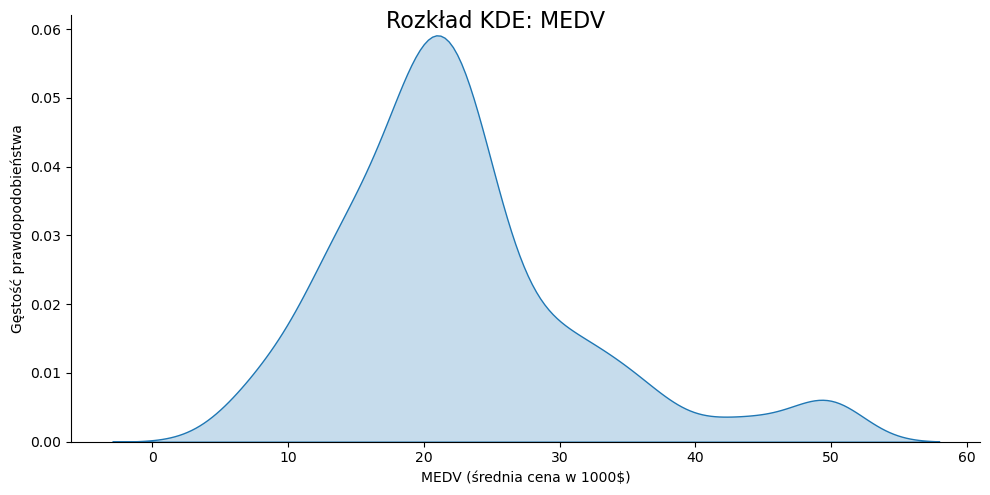

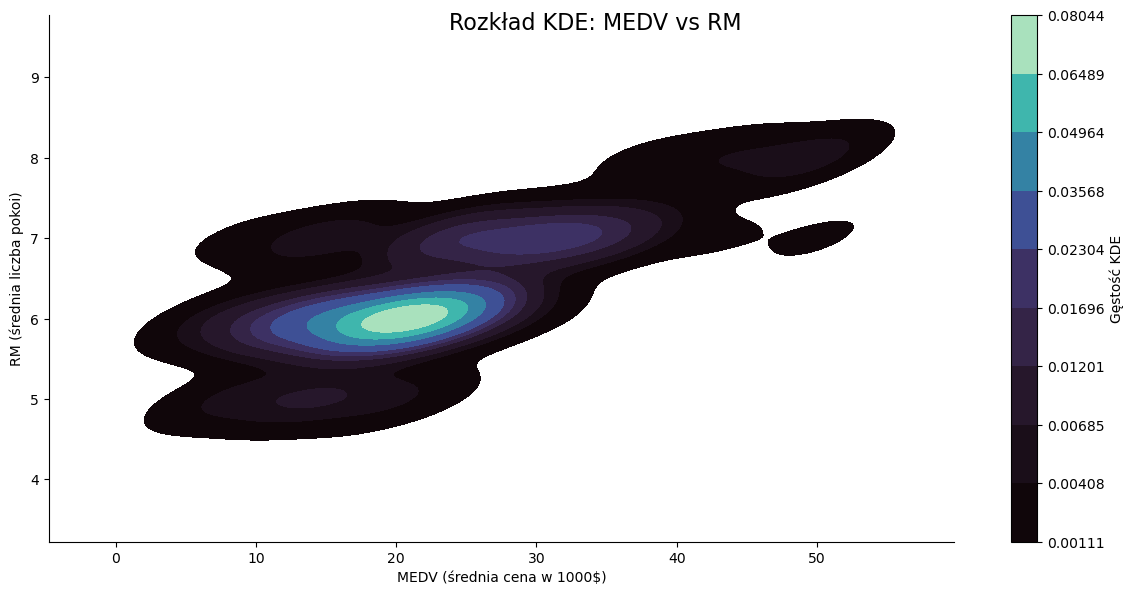

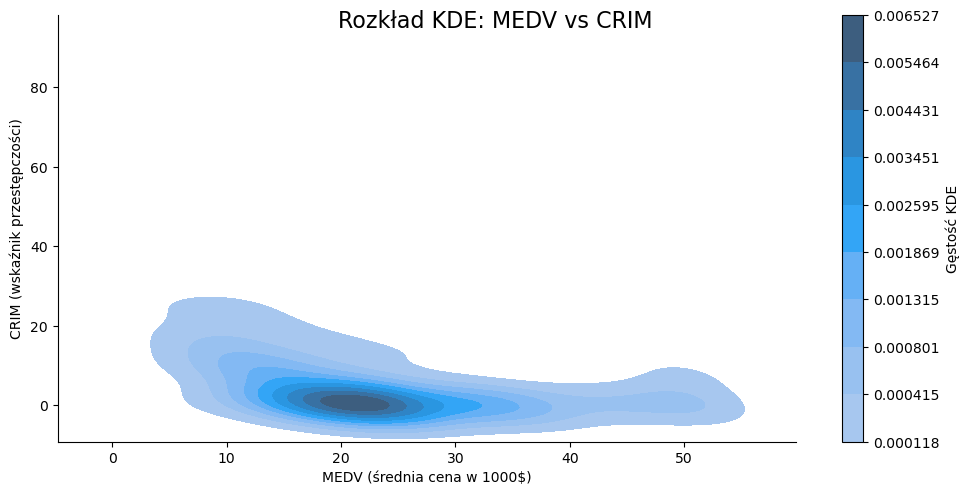

In [46]:
from matplotlib import pyplot as plt


boston = pd.read_csv('boston.txt', skiprows=22, sep='\s+', header=None)
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
data = []
for row in range(0, len(boston), 2):
    combined = boston.iloc[row].tolist() + boston.iloc[row + 1].dropna().tolist()
    data.append(combined)
boston = pd.DataFrame(data, columns=columns)

g0 = sns.displot(data=boston, x='MEDV', kind='kde',fill=True, height=5, aspect=2)
g0.fig.suptitle('Rozkład KDE: MEDV', fontsize=16)
g0.set_axis_labels('MEDV (średnia cena w 1000$)', 'Gęstość prawdopodobieństwa')

boston['RM'] = boston['RM'].astype(float).round().astype(int)
boston['RM']

g1 = sns.displot(
    data=boston,
    x='MEDV',
    y='RM',
    kind='kde',
    fill=True,
    height=6,
    aspect=2,
    cmap='mako'
)
g1.fig.suptitle('Rozkład KDE: MEDV vs RM', fontsize=16)
g1.set_axis_labels('MEDV (średnia cena w 1000$)', 'RM (średnia liczba pokoi)')
mappable1 = g1.ax.collections[0]
cbar1 = g1.fig.colorbar(mappable1, ax=g1.ax, label='Gęstość KDE')

g2 = sns.displot(data=boston, x='MEDV', y='CRIM', kind='kde', fill=True, height=5, aspect=2)
g2.fig.suptitle('Rozkład KDE: MEDV vs CRIM', fontsize=16)
g2.set_axis_labels('MEDV (średnia cena w 1000$)', 'CRIM (wskaźnik przestępczości)')
mappable2 = g2.ax.collections[0]
cbar2 = g2.fig.colorbar(mappable2, ax=g2.ax, label='Gęstość KDE')


* **g0**: Najczęściej sprzedają się mieszkania w cenach około 20 000$
* **g1**: Sprzedają się mieszkania 6 pokojowe za około 20 000$.
* **g2**: Cena sprzedaży mieszkań rośnie dla mniejszego współczynnika przestępczości w okolicy.